### Random Forest model

In [269]:
#Reference
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [46]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [47]:
df=pd.read_csv('df_vars_modeling_dpto_final.csv')
df

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,0.535800,0.692200,14.200000,1.928453e+07,137.67000,7413.780000,2826.540000,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,27992171911,52829438440,80821610351,0.927392
1,2016,8,8000,0.436800,0.698500,4.580000,1.549513e+07,110.62000,375.660000,110.230000,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,8695209114,28774131776,37469340890,0.975304
2,2016,11,11001,0.412800,0.532400,1.800938,1.357851e+07,96.93375,1782.839375,1269.656563,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,4591990672,44654525711,49246516383,0.956000
3,2016,13,13000,0.388700,0.647800,2.140000,1.457045e+07,104.02000,1370.430000,704.020000,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,19951902097,27358797289,47310699386,0.790543
4,2016,15,15000,0.495300,0.676300,1.280000,1.852046e+07,132.21000,2639.780000,1694.060000,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,17516978034,6708924973,24225903007,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2019,91,91000,0.305530,0.636270,NaN,NaN,NaN,NaN,NaN,...,52.359497,4.000000,1.215633,67.000000,21.257215,30.873500,0,177484873,177484873,0.928500
128,2019,94,94000,0.480100,0.549040,NaN,NaN,NaN,NaN,NaN,...,65.191442,3.000000,0.918189,89.000000,27.239617,46.020164,534281300,7108304,541389604,1.000000
129,2019,95,95000,0.503210,0.592438,NaN,NaN,NaN,NaN,NaN,...,17.101595,8.500000,4.593769,37.250000,10.793312,50.933432,534281300,762671702,1296953002,0.907500
130,2019,97,97000,0.496997,0.525490,NaN,NaN,NaN,NaN,NaN,...,11.340422,1.333333,1.410219,30.333333,27.290174,45.854152,534281300,171584563,705865863,0.731333


In [26]:
#Thousands of millions
#Columns Conectividad, 

In [48]:
df['conectividad']=df['conectividad'].div(1000000)
df['transformacion']=df['transformacion'].div(1000000)
df['inversion_total']=df['inversion_total'].div(1000000)


In [28]:
#Drop NA

In [55]:
df=df.dropna()
df

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,0.5358,9.0,14.200000,1.928453e+07,137.67000,7413.780000,2826.540000,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,27992.171911,52829.438440,80821.610351,0.927392
1,2016,8,8000,0.4368,9.0,4.580000,1.549513e+07,110.62000,375.660000,110.230000,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,8695.209114,28774.131776,37469.340890,0.975304
2,2016,11,11001,0.4128,2.0,1.800938,1.357851e+07,96.93375,1782.839375,1269.656563,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,4591.990672,44654.525711,49246.516383,0.956000
3,2016,13,13000,0.3887,7.0,2.140000,1.457045e+07,104.02000,1370.430000,704.020000,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,19951.902097,27358.797289,47310.699386,0.790543
4,2016,15,15000,0.4953,8.0,1.280000,1.852046e+07,132.21000,2639.780000,1694.060000,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,17516.978034,6708.924973,24225.903007,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018,91,91000,0.3665,6.0,0.030000,9.485223e+06,60.29000,120.710000,1.270000,...,45.515000,4.000000,1.415000,70.500000,30.735000,36.442402,16030.667171,372.966581,16403.633752,0.805000
95,2018,94,94000,0.5368,6.0,0.010000,8.069586e+06,51.29000,29.400000,21.620000,...,77.790000,3.000000,1.480000,64.000000,31.510000,52.265714,0.000000,153.614884,153.614884,1.000000
96,2018,95,95000,0.4280,4.0,0.040000,6.716678e+06,42.69000,157.340000,2.640000,...,13.577500,6.500000,2.502500,38.750000,10.130000,43.174340,13262.151892,327.706027,13589.857919,0.952500
97,2018,97,97000,0.3905,7.0,0.010000,6.216212e+06,39.51000,19.060000,0.890000,...,24.073333,1.000000,0.306667,25.333333,18.000000,39.975885,5304.860757,60.923959,5365.784716,0.833333


In [50]:
max=df['promedio_del_componente_de_resultados_por_departamento_y_nacion'].max()
min=df['promedio_del_componente_de_resultados_por_departamento_y_nacion'].min()
print(df['promedio_del_componente_de_resultados_por_departamento_y_nacion'].max())
print(df['promedio_del_componente_de_resultados_por_departamento_y_nacion'].min())

0.7256999999999999
0.5043


In [51]:
#THE STEPS OF THE SCALE
(max-min)/10

0.022139999999999993

In [54]:
#PREPARE RANDON FORREST MODEL
#LIKERT SCALE
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion >= 0.504) & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.526) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=1
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.526)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.548) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=2
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.548)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.57) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=3
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.57)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.592) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=4
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.592)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.614) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=5
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.614)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.636) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=6
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.636)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.658) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=7
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.658)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.68) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=8
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.68)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.702) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=9
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.702)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.726) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=10
df


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,0.5358,9.0,14.200000,1.928453e+07,137.67000,7413.780000,2826.540000,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,27992.171911,52829.438440,80821.610351,0.927392
1,2016,8,8000,0.4368,9.0,4.580000,1.549513e+07,110.62000,375.660000,110.230000,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,8695.209114,28774.131776,37469.340890,0.975304
2,2016,11,11001,0.4128,2.0,1.800938,1.357851e+07,96.93375,1782.839375,1269.656563,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,4591.990672,44654.525711,49246.516383,0.956000
3,2016,13,13000,0.3887,7.0,2.140000,1.457045e+07,104.02000,1370.430000,704.020000,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,19951.902097,27358.797289,47310.699386,0.790543
4,2016,15,15000,0.4953,8.0,1.280000,1.852046e+07,132.21000,2639.780000,1694.060000,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,17516.978034,6708.924973,24225.903007,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018,91,91000,0.3665,6.0,0.030000,9.485223e+06,60.29000,120.710000,1.270000,...,45.515000,4.000000,1.415000,70.500000,30.735000,36.442402,16030.667171,372.966581,16403.633752,0.805000
95,2018,94,94000,0.5368,6.0,0.010000,8.069586e+06,51.29000,29.400000,21.620000,...,77.790000,3.000000,1.480000,64.000000,31.510000,52.265714,0.000000,153.614884,153.614884,1.000000
96,2018,95,95000,0.4280,4.0,0.040000,6.716678e+06,42.69000,157.340000,2.640000,...,13.577500,6.500000,2.502500,38.750000,10.130000,43.174340,13262.151892,327.706027,13589.857919,0.952500
97,2018,97,97000,0.3905,7.0,0.010000,6.216212e+06,39.51000,19.060000,0.890000,...,24.073333,1.000000,0.306667,25.333333,18.000000,39.975885,5304.860757,60.923959,5365.784716,0.833333


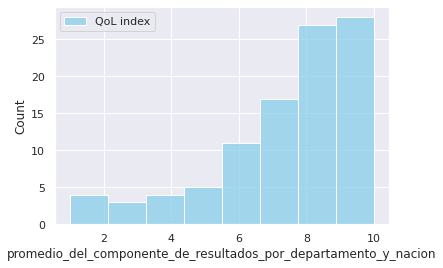

In [53]:
#plot of the distibution of Quality of Life Index
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.set(style="darkgrid")

sns.histplot(data=df, x="promedio_del_componente_de_resultados_por_departamento_y_nacion", color="skyblue", label="QoL index", kde=False)

plt.legend() 
plt.show()


In [90]:
# Labels are the values we want to predict
labels = np.array(df['promedio_del_componente_de_resultados_por_departamento_y_nacion'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('promedio_del_componente_de_resultados_por_departamento_y_nacion', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
print(labels)
print(features)

[ 9.  9.  2.  7.  8.  9.  5.  7. 10.  8.  9.  6.  8.  7.  8.  7.  7.  8.
  9.  9.  8.  9.  8.  9.  7.  6.  6.  5.  6.  9.  4.  4.  3.  9. 10.  1.
  8.  8.  9.  5.  7. 10.  8.  8.  6.  9.  7.  8.  7.  8.  8.  9.  9.  8.
 10.  7.  9.  8.  7.  6.  4.  6.  8.  3.  6.  2.  8. 10.  1.  8.  8.  9.
  5.  7. 10.  8.  8.  6.  9.  8.  9.  7.  7.  8.  9.  9.  8. 10.  8.  9.
  8.  7.  7.  5.  6.  6.  4.  7.  3.]
[[2.01600000e+03 5.00000000e+00 5.00000000e+03 ... 5.28294384e+04
  8.08216104e+04 9.27392000e-01]
 [2.01600000e+03 8.00000000e+00 8.00000000e+03 ... 2.87741318e+04
  3.74693409e+04 9.75304348e-01]
 [2.01600000e+03 1.10000000e+01 1.10010000e+04 ... 4.46545257e+04
  4.92465164e+04 9.56000000e-01]
 ...
 [2.01800000e+03 9.50000000e+01 9.50000000e+04 ... 3.27706027e+02
  1.35898579e+04 9.52500000e-01]
 [2.01800000e+03 9.70000000e+01 9.70000000e+04 ... 6.09239590e+01
  5.36578472e+03 8.33333333e-01]
 [2.01800000e+03 9.90000000e+01 9.90000000e+04 ... 2.81054389e+02
  2.81054389e+02 8.00000000e-01

In [91]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print(train_features)
print(train_labels)

[[2.01700000e+03 5.00000000e+00 5.00000000e+03 ... 4.62434879e+04
  5.47063230e+04 9.00521526e-01]
 [2.01600000e+03 2.30000000e+01 2.30000000e+04 ... 2.69120057e+04
  4.20225558e+04 8.89733333e-01]
 [2.01800000e+03 5.00000000e+01 5.00000000e+04 ... 1.76733685e+04
  1.78297749e+04 9.21724138e-01]
 ...
 [2.01600000e+03 4.70000000e+01 4.70000000e+04 ... 1.17070876e+04
  3.28388221e+04 9.20466667e-01]
 [2.01800000e+03 8.60000000e+01 8.60000000e+04 ... 9.81812046e+02
  1.26362977e+04 9.27692308e-01]
 [2.01700000e+03 6.30000000e+01 6.30000000e+04 ... 2.89885447e+04
  3.33337952e+04 8.84131396e-01]]
[ 9.  8.  7.  6.  2.  6.  4.  6.  9.  9.  9.  8.  1.  7.  5. 10.  7.  7.
  5.  9.  9.  6.  8.  7.  7.  7.  8.  9. 10.  6.  5.  8.  8.  7.  9.  3.
 10.  8.  8.  8.  7. 10.  6.  4.  9. 10.  7.  7.  9.  8.  8.  3.  5.  6.
  3.  8.  8.  9.  9.  9.  9.  2.  9. 10.  8. 10.  8.  7.  8.  4.  9.  8.
  7.  9.]


In [92]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (74, 93)
Training Labels Shape: (74,)
Testing Features Shape: (25, 93)
Testing Labels Shape: (25,)


In [93]:
#BaseLine
#Average Max - Min
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('mdm')]
# Baseline errors, and display average baseline error
baseline_errors = abs(5 - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  2.52


In [38]:
#We have our goal! If we can’t beat an average error of 3.62 degrees, then we need to rethink our approach.

In [39]:
#Train Model

In [94]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [21]:
#Make Predictions

In [95]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.75 degrees.


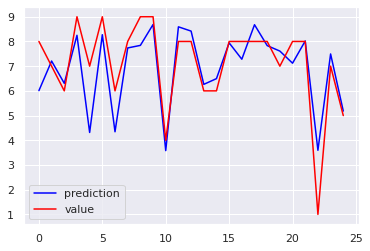

In [116]:
#plot of the predictions and values
plt.plot(predictions,label='prediction',color='blue')
plt.plot(test_labels,label='value',color='red')
plt.legend()

In [43]:
#Determine performance metrics

In [96]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.16 %.


In [45]:
#Visualizing a single tree

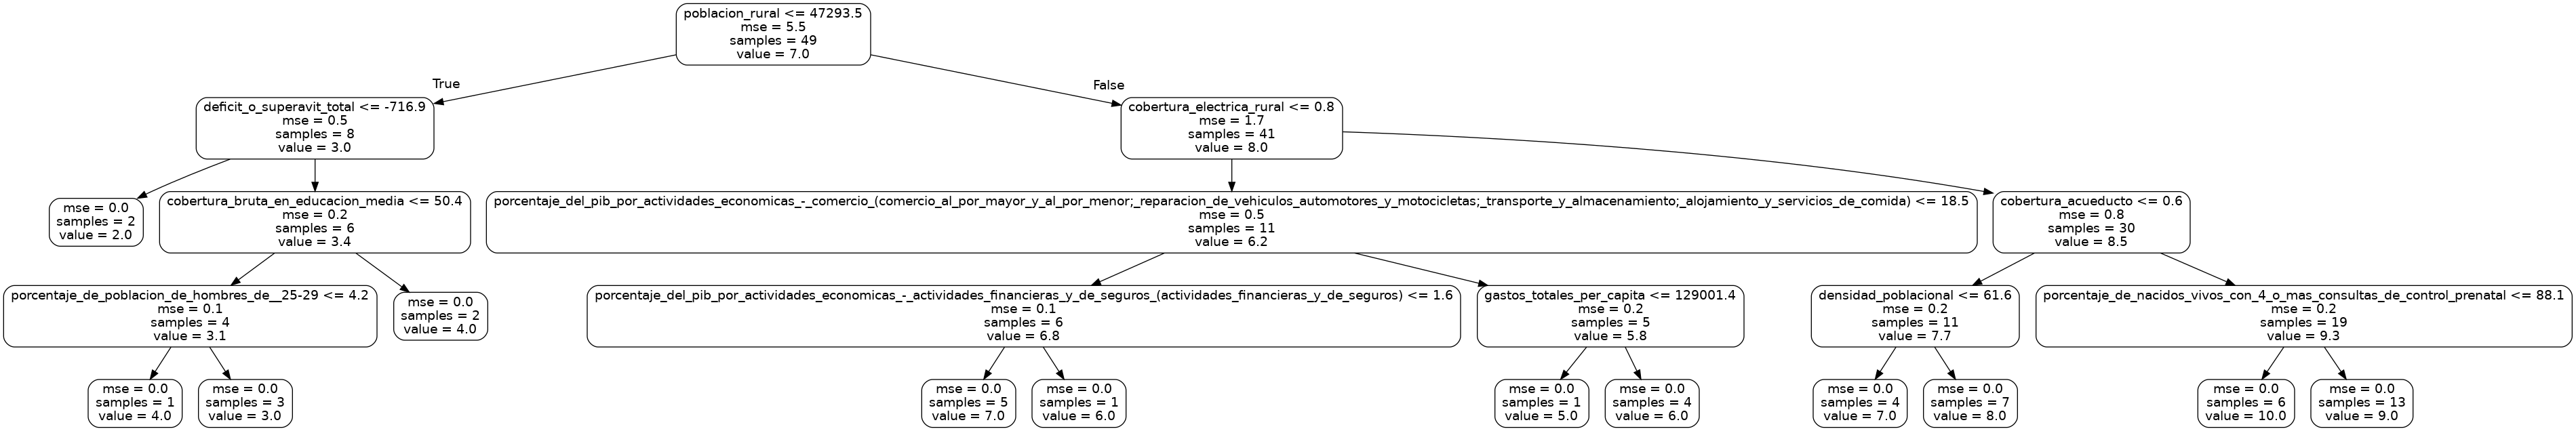

In [97]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(filename='tree.png')

In [49]:
#Variable Importance

In [99]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: poblacion_rural      Importance: 0.354
Variable: pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras) Importance: 0.1162
Variable: tasa_de_mortalidad_(x_cada_1.000_habitantes) Importance: 0.1127
Variable: cobertura_electrica_rural Importance: 0.0685
Variable: cobertura_acueducto  Importance: 0.0492
Variable: porcentaje_del_pib_por_actividades_economicas_-_industrias_manufactureras_(industrias_manufactureras) Importance: 0.0181
Variable: cobertura_transicion Importance: 0.0151
Variable: densidad_poblacional Importance: 0.0132
Variable: porcentaje_del_pib_por_actividades_economicas_-_actividades_inmobiliarias_(actividades_inmobiliarias) Importance: 0.0122
Variable: cobertura_bruta_en_educacion_-_total Importance: 0.011
Variable: porcentaje_de_nacidos_vivos_con_4_o_mas_consultas_de_control_prenatal Importance: 0.0109
Variable: porcentaje_de_nacidos_vivos_hijos_de_mujeres_de_18_a_26_anios Importance: 0.0107
Variable: capacidad_de_ahor

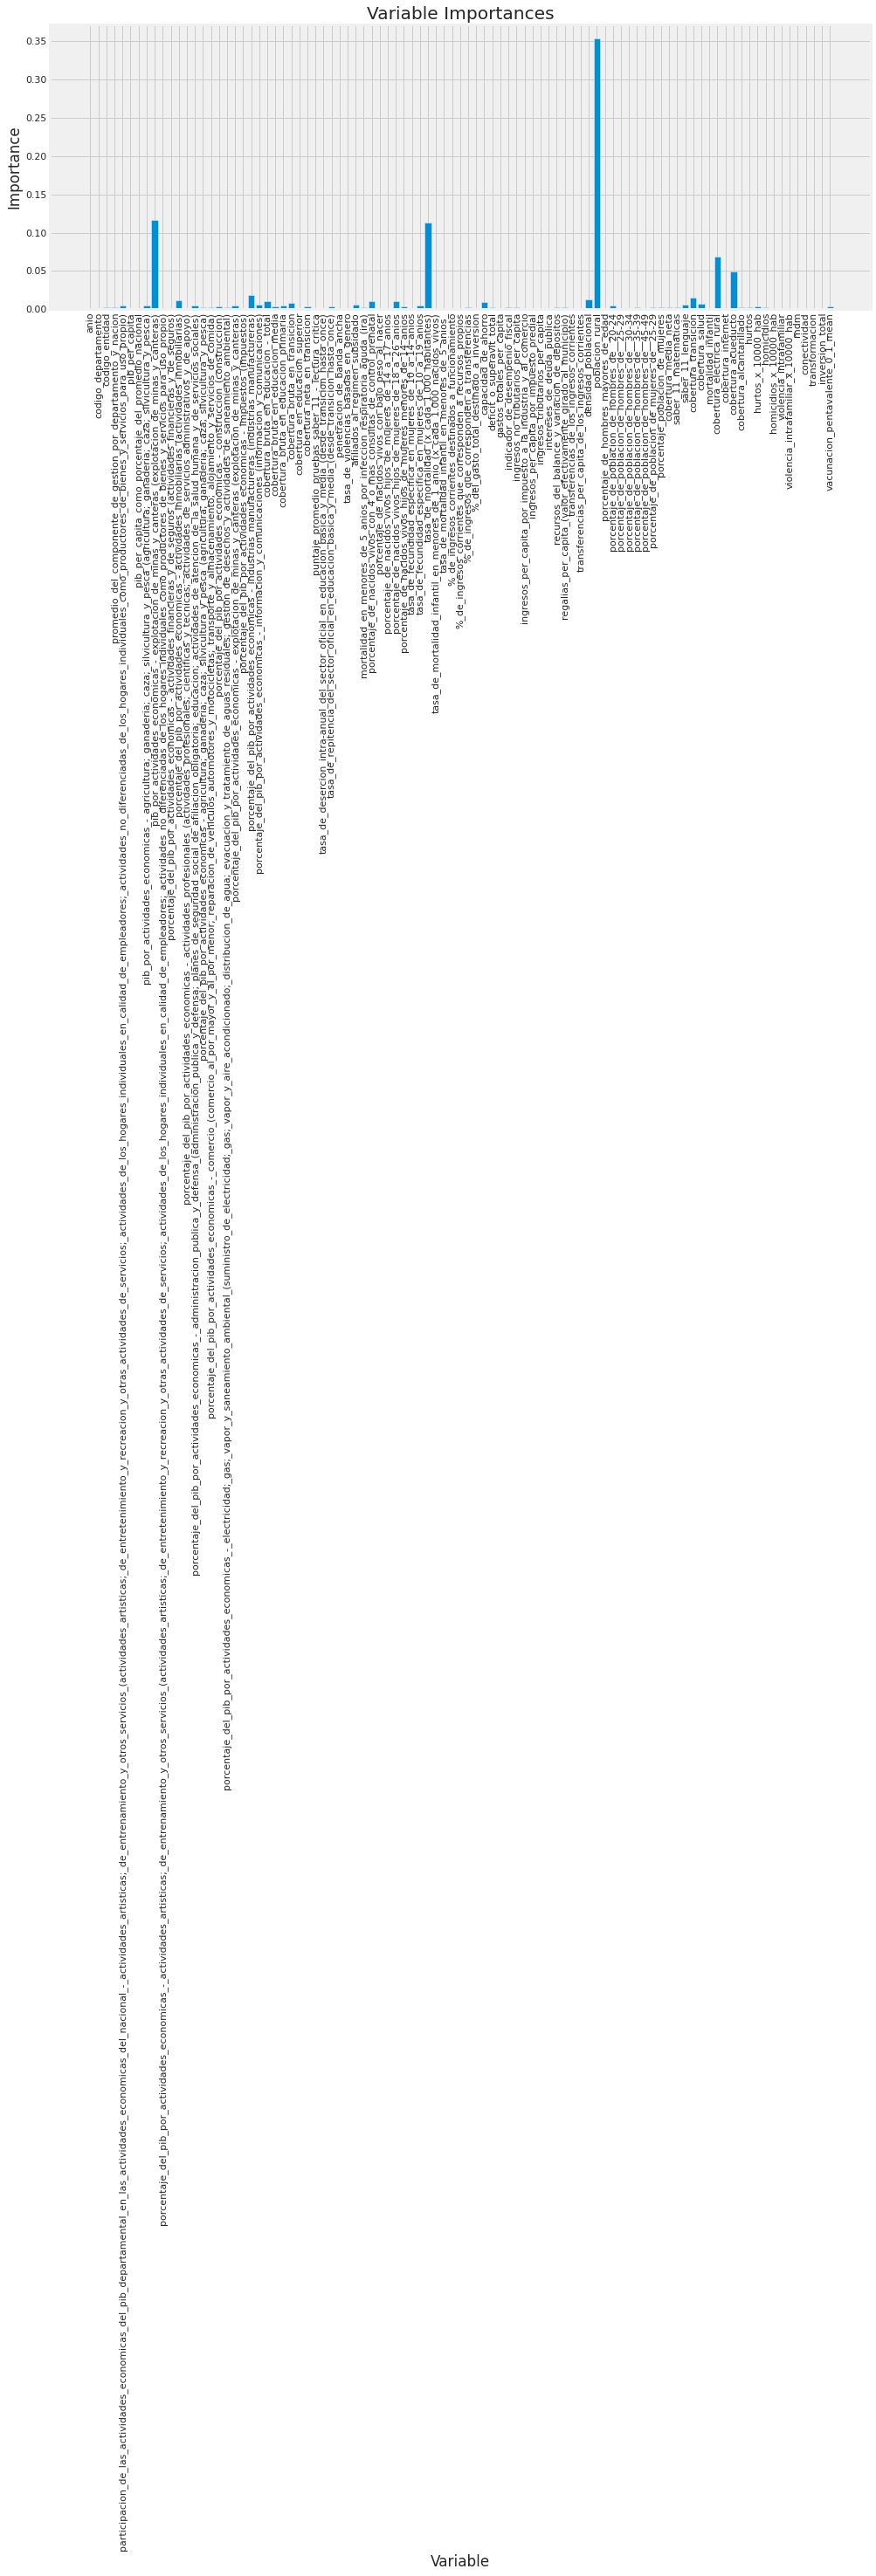

In [119]:
#BAR PLOT OF THE FEATURE IMPORTANCES
%matplotlib inline
plt.figure(figsize=(15,6))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Only one importante Variable

In [100]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('poblacion_rural'), feature_list.index('pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras)'),feature_list.index('tasa_de_mortalidad_(x_cada_1.000_habitantes)'),feature_list.index('cobertura_electrica_rural'),feature_list.index('cobertura_acueducto'),feature_list.index('cobertura_transicion'),feature_list.index('densidad_poblacional'),feature_list.index('transformacion'),feature_list.index('inversion_total'),feature_list.index('conectividad')  ]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.75 degrees.
Accuracy: 80.76 %.
